# **Lista 3 - Questões 2, 3 e 4**

In [ ]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy.linalg import eigh
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import mean_squared_error


import statsmodels.formula.api as smf

mpl.rcParams['figure.dpi'] = 100
#plt.rc('text',usetex=True)
mpl.rcParams['text.usetex'] = False


## **Questão 2**

**a)**

In [ ]:
df = pd.read_csv('SENIC.csv')

df.head()

,id,tempo,idade,risco_infeccao,cultura,x_ray,numero_camas,afiliacao,regiao,census,enfermeiras,servicos
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


Modelo 1:

$$ Y = \beta_0 + X_1 \beta_1 + X_2 \beta_2 + X_3 \beta_3 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{idade} + \beta_2 \times \texttt{prob risco de infecção} + + \beta_3 \times \texttt{% de serviços fornecidos} + \varepsilon $$

In [ ]:
df1 = df[["tempo","idade","risco_infeccao","servicos"]].copy()
df1.head()

,tempo,idade,risco_infeccao,servicos
0,7.13,55.7,4.1,60.0
1,8.82,58.2,1.6,40.0
2,8.34,56.9,2.7,20.0
3,8.95,53.7,5.6,40.0
4,11.20,56.5,5.7,40.0


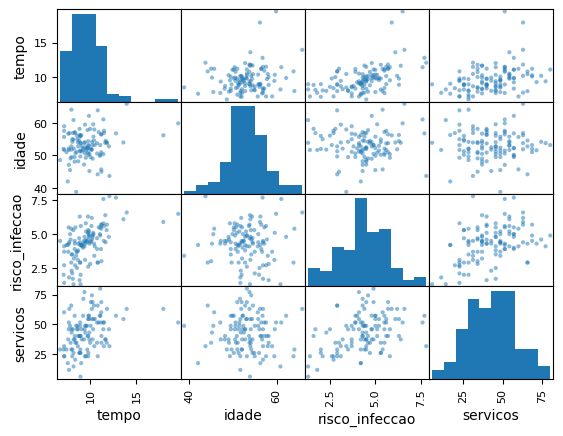

In [ ]:
pd.plotting.scatter_matrix(df1)

plt.show()

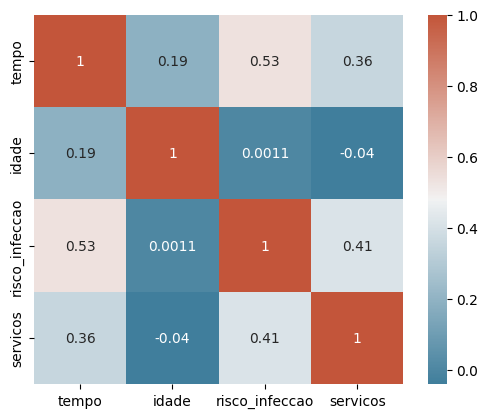

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = df1.corr()
ax = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    annot = True
)

Aqui vemos que, enquanto a maioria das covariáveis mantém uma boa correlação entre as outras e com a variável resposta, a covariável "idade" se destaca por ter correlações baixas e/ou negativas com o restante. Outra  correlação com valor baixo é "risco_infeccao" x "idade". Por outro lado, "risco_infeccao" x "tempo" tem uma covariância com um valor considerável.

Modelo 2:

$$ Y = \beta_0 + X_1 \beta_1 + X_2 \beta_2 + X_3 \beta_3 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{n° de leitos} + \beta_2 \times \texttt{prob risco de infecção} + + \beta_3 \times \texttt{% de serviços fornecidos} + \varepsilon $$

In [ ]:
df2 = df[["tempo","numero_camas","risco_infeccao","servicos"]].copy()
df2.head()

,tempo,numero_camas,risco_infeccao,servicos
0,7.13,279,4.1,60.0
1,8.82,80,1.6,40.0
2,8.34,107,2.7,20.0
3,8.95,147,5.6,40.0
4,11.20,180,5.7,40.0


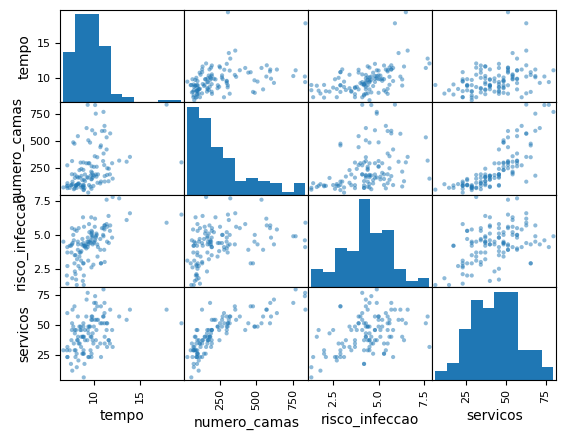

In [ ]:
pd.plotting.scatter_matrix(df2)

plt.show()

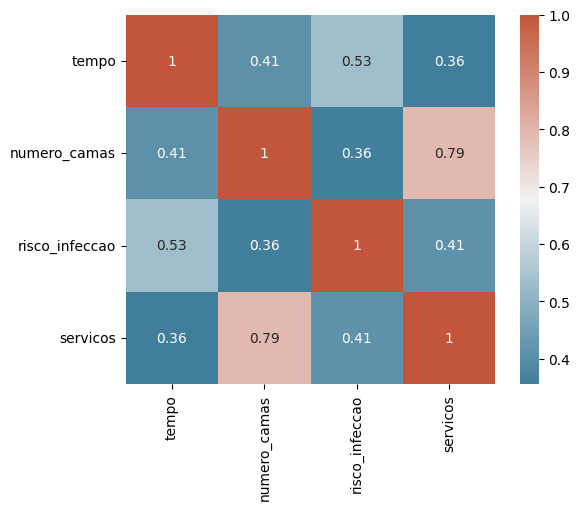

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = df2.corr()
ax = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    annot = True
)

Com a mudança de uma covariável ("numero_camas"), vemos que no geral as correlações se mantém agora com valores positivos, com destaque para a alta correlação entre "numero_camas" e "servicos".

**b) e c)**

In [ ]:
# Modelo 1
model1 = smf.ols(formula='tempo ~ idade + risco_infeccao + servicos', data=df)

result1 = model1.fit()

residuos1 = result1.resid

result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     19.12
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.93e-10
Time:                        23:22:34   Log-Likelihood:                -209.16
No. Observations:                 113   AIC:                             426.3
Df Residuals:                     109   BIC:                             437.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3865      1.866      0.743      0.459      -2.312       5.085
idade              0.0837      0.033      2.518      0.013       0.018       0.150
risco_infeccao     0.6584      0.121      5.426      0.000       0.418       0.899
servicos           0.0217      0.011      2.029      0.045       0.001       0.043
==============================================================================
Omnibus:                       57.943   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.953
Skew:                           1.680   Prob(JB):                     3.25e-60
Kurtosis:                       9.848   Cond. No.                         878.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo 1 apresentou um valor de $R^2 = 0.345$, valor considerado baixo em termos dessa medida, mas o maior entre os dois modelos.

In [ ]:
# Modelo 2
model2 = smf.ols(formula='tempo ~ numero_camas + risco_infeccao + servicos', data=df)

result2 = model2.fit()

residuos2 = result2.resid

result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     18.78
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.85e-10
Time:                        23:22:34   Log-Likelihood:                -209.51
No. Observations:                 113   AIC:                             427.0
Df Residuals:                     109   BIC:                             437.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.4674      0.615     10.513      0.000       5.248       7.687
numero_camas       0.0030      0.001      2.373      0.019       0.000       0.006
risco_infeccao     0.6477      0.122      5.313      0.000       0.406       0.889
servicos          -0.0093      0.017     -0.562      0.575      -0.042       0.023
==============================================================================
Omnibus:                       63.365   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.279
Skew:                           1.835   Prob(JB):                     3.15e-72
Kurtosis:                      10.515   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O modelo 1 apresentou um valor de $R^2 = 0.341$, valor considerado baixo em termos dessa medida e o menor entre os dois modelos.

Vemos que para ambos os modelos, em termos de $R^2$, nenhum modelo é preferível, uma vez que os valores de ambos os modelos são baixos.

**d)**

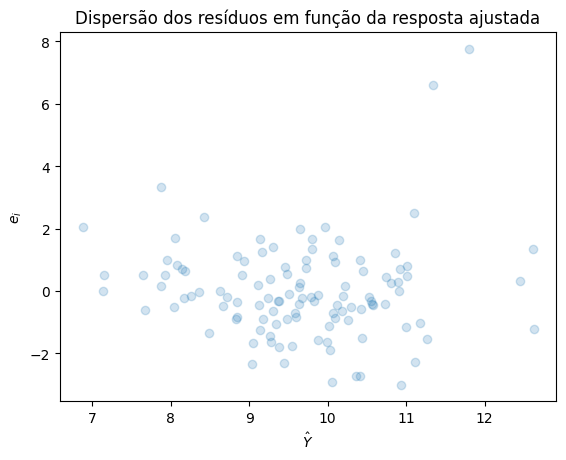

In [ ]:
# Modelo 1 (Y_chapéu)
y1_pred = result1.predict()

plt.plot(y1_pred,residuos1,'o',color='C0',alpha=0.2)
plt.xlabel(r'$\hat{Y}$',fontsize=10)
plt.ylabel(r'$e_i$',fontsize=10)
plt.title(r'Dispersão dos resíduos em função da resposta ajustada',fontsize=12)

plt.show()

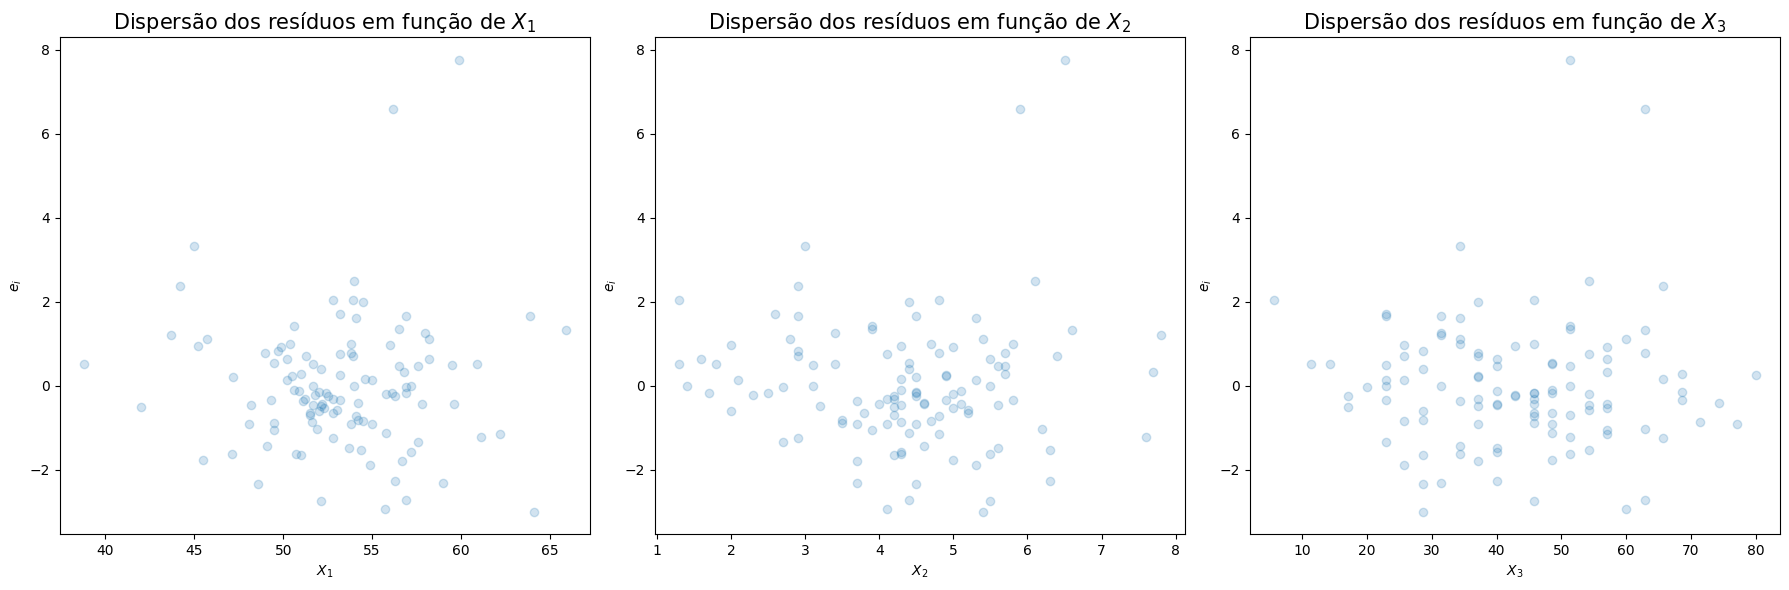

In [ ]:
# Modelo 1 (covariáveis)
plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 3, 1)
ax1.plot(df['idade'],residuos1,'o',color='C0',alpha=0.2)
ax1.set_title(r'Dispersão dos resíduos em função de $X_1$',fontsize=15)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$e_i$')

ax2 = plt.subplot(1, 3, 2)
ax2.plot(df['risco_infeccao'],residuos1,'o',color='C0',alpha=0.2)
ax2.set_title(r'Dispersão dos resíduos em função de $X_2$',fontsize=15)
plt.xlabel(r'$X_2$')
plt.ylabel(r'$e_i$')

ax3 = plt.subplot(1, 3, 3)
ax3.plot(df['servicos'],residuos1,'o',color='C0',alpha=0.2)
ax3.set_title(r'Dispersão dos resíduos em função de $X_3$',fontsize=15)
plt.xlabel(r'$X_3$')
plt.ylabel(r'$e_i$')

plt.tight_layout()
plt.show()

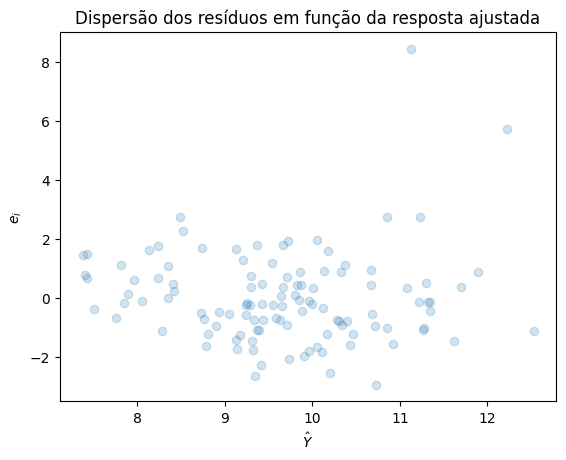

In [ ]:
# Modelo 2 (Y_chapéu)
y2_pred = result2.predict()

plt.plot(y2_pred,residuos2,'o',color='C0',alpha=0.2)
plt.xlabel(r'$\hat{Y}$',fontsize=10)
plt.ylabel(r'$e_i$',fontsize=10)
plt.title(r'Dispersão dos resíduos em função da resposta ajustada',fontsize=12)

plt.show()

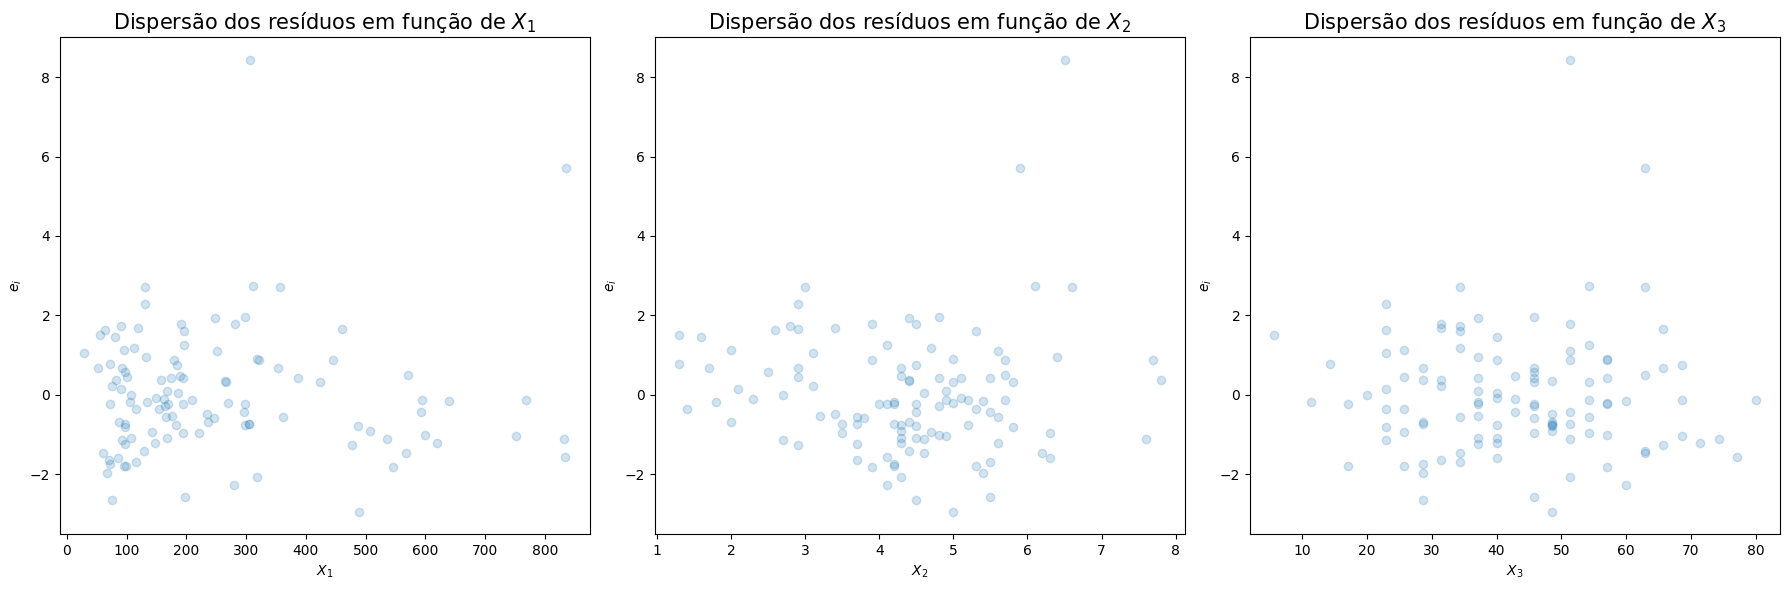

In [ ]:
# Modelo 2 (covariáveis)
plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 3, 1)
ax1.plot(df['numero_camas'],residuos2,'o',color='C0',alpha=0.2)
ax1.set_title(r'Dispersão dos resíduos em função de $X_1$',fontsize=15)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$e_i$')

ax2 = plt.subplot(1, 3, 2)
ax2.plot(df['risco_infeccao'],residuos2,'o',color='C0',alpha=0.2)
ax2.set_title(r'Dispersão dos resíduos em função de $X_2$',fontsize=15)
plt.xlabel(r'$X_2$')
plt.ylabel(r'$e_i$')

ax3 = plt.subplot(1, 3, 3)
ax3.plot(df['servicos'],residuos2,'o',color='C0',alpha=0.2)
ax3.set_title(r'Dispersão dos resíduos em função de $X_3$',fontsize=15)
plt.xlabel(r'$X_3$')
plt.ylabel(r'$e_i$')

plt.tight_layout()
plt.show()

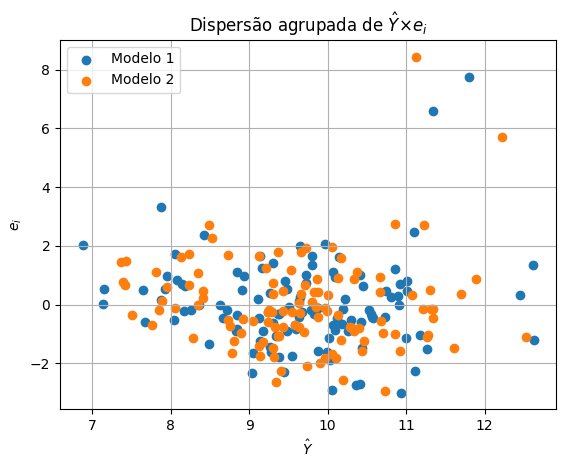

In [ ]:
# Plotando um gráfico unindo os dois modelos
plt.scatter(y1_pred, residuos1, label = 'Modelo 1')
plt.scatter(y2_pred, residuos2, label = 'Modelo 2')
plt.xlabel('$\hat{Y}$')
plt.ylabel('$e_i$')
plt.title('Dispersão agrupada de $\hat{Y}×e_i$')

plt.legend()
plt.grid(True)
plt.show()

**e)**

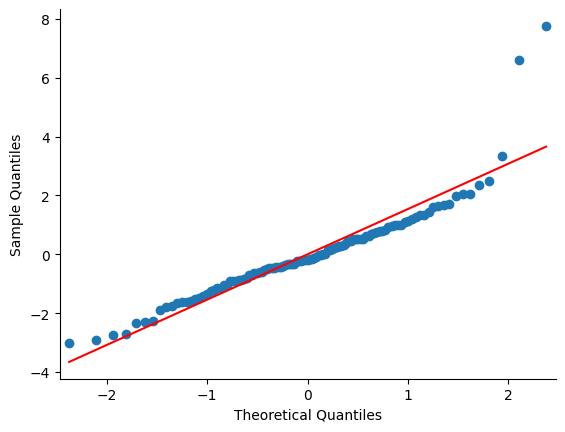

In [ ]:
# Modelo 1
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(residuos1,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

Os quantis se distribuem bem pela reta, com poucos outliers, mas alguns a mais que o Modelo 2.

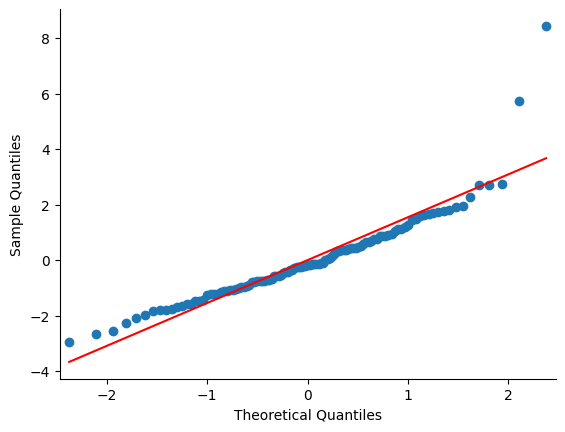

In [ ]:
# Modelo 2
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(residuos2,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

Novamente, os quantis se distribuem de forma bem homogênea pela reta dos resíduos "studentizados", com alguns poucos outliers. Este QQ Plot indica fortemente uma Distribuição Normal dos resíduos e um bom encaixe do modelo, sendo este o que visualmente aparenta ser mais apropriado em termos da análise dos resíduos.

## **Questão 3**

**a)**

In [ ]:
df3 = df[["tempo","idade","numero_camas","risco_infeccao","servicos"]].copy()
df3.head()

,tempo,idade,numero_camas,risco_infeccao,servicos
0,7.13,55.7,279,4.1,60.0
1,8.82,58.2,80,1.6,40.0
2,8.34,56.9,107,2.7,20.0
3,8.95,53.7,147,5.6,40.0
4,11.20,56.5,180,5.7,40.0


In [ ]:
df3.corr()

,tempo,idade,numero_camas,risco_infeccao,servicos
tempo,1.000000,0.188914,0.409265,0.533444,0.355538
idade,0.188914,1.000000,-0.058823,0.001093,-0.040451
numero_camas,0.409265,-0.058823,1.000000,0.359770,0.794524
risco_infeccao,0.533444,0.001093,0.359770,1.000000,0.412601
servicos,0.355538,-0.040451,0.794524,0.412601,1.000000


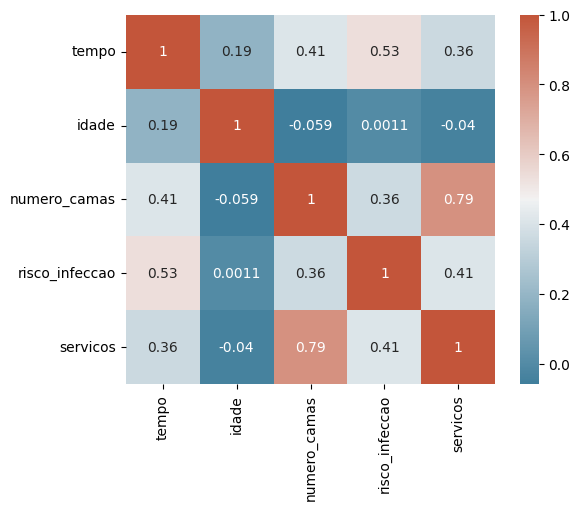

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = df3.corr()
ax = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    annot = True
)

**b)**

In [ ]:
# Modelo 1
model3_1 = smf.ols(formula='tempo ~ servicos', data=df3)

result3_1 = model3_1.fit()

result3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     16.06
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           0.000111
Time:                        23:22:39   Log-Likelihood:                -225.41
No. Observations:                 113   AIC:                             454.8
Df Residuals:                     111   BIC:                             460.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7188      0.510     15.129      0.000       6.708       8.730
servicos       0.0447      0.011      4.008      0.000       0.023       0.067
==============================================================================
Omnibus:                       69.105   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.891
Skew:                           2.029   Prob(JB):                     1.44e-82
Kurtosis:                      10.973   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mse = result3_1.mse_resid
mse

3.2205696926312624

O coeficiente associado à variável "servicos" tem valor ${\beta_1} = 0.0447$ e erro padrão ${\sigma} = 0.011$.

**c)**

In [ ]:
# Modelo 1
model3 = smf.ols(formula='tempo ~ idade + numero_camas + risco_infeccao + servicos', data=df3)

result3 = model3.fit()

result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     16.71
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.09e-10
Time:                        23:22:39   Log-Likelihood:                -205.83
No. Observations:                 113   AIC:                             421.7
Df Residuals:                     108   BIC:                             435.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8136      1.828      0.992      0.323      -1.810       5.437
idade              0.0875      0.032      2.694      0.008       0.023       0.152
numero_camas       0.0032      0.001      2.560      0.012       0.001       0.006
risco_infeccao     0.6406      0.119      5.403      0.000       0.406       0.876
servicos          -0.0095      0.016     -0.592      0.555      -0.041       0.022
==============================================================================
Omnibus:                       55.041   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.501
Skew:                           1.610   Prob(JB):                     3.62e-53
Kurtosis:                       9.398   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo 3:

$$ Y = 1.8136 + 0.0875X_1 + 0.0032X_2 + 0.6406X_3 - 0.0095X_4 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{idade} + \beta_2 \times \texttt{n° de leitos} + \beta_3 \times \texttt{prob risco de infecção} + \beta_4 \times \texttt{% de serviços fornecidos} + \varepsilon $$

**d)**

Enquanto que no modelo simples o coeficiente associado à variável "servicos" tem valor ${\beta_1} = 0.0447$, no modelo múltiplo ${\beta_4} = -0.0095$. Faremos um teste de hipóteses para analisar a relação de cada um dos coeficientes em seus respectivos modelos.

In [ ]:
hypothesis = 'servicos = 0' # Hipótese nula
t_test = result3_1.t_test(hypothesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0447      0.011      4.008      0.000       0.023       0.067


In [ ]:
# Graus de liberdade : linhas - n°_betas + 1  = 113 - 1
t = abs(stats.t.ppf(0.05,112))
t

1.6585726287769256

Uma vez que $t=1.6586 < 4.008=t^*$, rejeita-se $H_0:{{\beta}_1} = 0$, com 95% de confiança.

In [ ]:
hypothesis = 'servicos = 0' # Hipótese nula
t_test = result3.t_test(hypothesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0095      0.016     -0.592      0.555      -0.041       0.022


In [ ]:
# Graus de liberdade : linhas - n°_betas + 1  = 113 - 4
t = abs(stats.t.ppf(0.05,109))
t

1.6589534581903573

Uma vez que $t=1.6590 > -0.592=t^*$, não se rejeita $H_0:{{\beta}_4} = 0$, com 95% de confiança.

Vemos que no modelo simples o coeficiente associado à variável "servicos" é significativo, enquanto que no modelo múltiplo não. Considerando as correlações encontradas anteriormente, percebemos que as outras covariáveis do modelo múltiplo têm maior correlação entre si e com a variável resposta que a nossa covariável "servicos".

**e)**

In [ ]:
hypothesis = 'risco_infeccao = 0' # Hipótese nula
t_test = result3.t_test(hypothesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6406      0.119      5.403      0.000       0.406       0.876


In [ ]:
# Graus de liberdade : linhas - n°_betas + 1 = 113 - 4
t = abs(stats.t.ppf(0.05,109))
t

1.6589534581903573

Uma vez que $t=1.6590 < 5.403=t^*$, rejeita-se $H_0:{{\beta}_3} = 0$, com 95% de confiança.

Considerando os resultados anteriores e as demais variáveis do nosso modelo, vemos que a "risco_infeccao" é a covariável com maior correlação com a variável resposta, fato sustentado pelo teste de hipóteses.

**f)**

In [ ]:
# Média dos quadrados dos resíduos
mse = result3.mse_resid
mse

2.3406399936683164

In [ ]:
import scipy.stats as st
st.f.ppf(0.025,4,109)

0.12027369593294679

Uma vez que $f=0.0717 < 16.71=f^*$, rejeita-se $H_0:{{\beta}_1 = {\beta}_2 = {\beta}_3 = {\beta}_4} = 0$, com 95% de confiança. Percebe-se também que o modelo tem um bom valor de $MSE$.

## **Questão 4**

**a)**

In [ ]:
df4 = df[["tempo","idade","cultura","regiao","census","servicos"]].copy()
df4.head()

,tempo,idade,cultura,regiao,census,servicos
0,7.13,55.7,9.0,4,207,60.0
1,8.82,58.2,3.8,2,51,40.0
2,8.34,56.9,8.1,3,82,20.0
3,8.95,53.7,18.9,4,53,40.0
4,11.20,56.5,34.5,1,134,40.0


Região 1:

In [ ]:
df4_reg1 = df4.loc[df4['regiao'] == 1]
df4_reg1.head()

,tempo,idade,cultura,regiao,census,servicos
4,11.20,56.5,34.5,1,134,40.0
9,8.84,56.3,29.6,1,59,40.0
10,11.07,53.2,28.5,1,591,80.0
12,12.78,56.8,46.0,1,252,57.1
17,11.62,53.9,25.5,1,113,37.1


In [ ]:
model_1 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=df4_reg1)

result_1 = model_1.fit()

residuos_1 = result_1.resid

result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.658
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00103
Time:                        23:22:39   Log-Likelihood:                -55.947
No. Observations:                  28   AIC:                             121.9
Df Residuals:                      23   BIC:                             128.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3819      5.279     -1.020      0.319     -16.302       5.538
idade          0.2847      0.098      2.911      0.008       0.082       0.487
cultura       -0.0015      0.044     -0.034      0.973      -0.093       0.090
census         0.0101      0.003      3.141      0.005       0.003       0.017
servicos      -0.0227      0.045     -0.507      0.617      -0.116       0.070
==============================================================================
Omnibus:                       16.297   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.471
Skew:                           1.324   Prob(JB):                     2.18e-05
Kurtosis:                       6.376   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Região 2:

In [ ]:
df4_reg2 = df4.loc[df4['regiao'] == 2]
df4_reg2.head()

,tempo,idade,cultura,regiao,census,servicos
1,8.82,58.2,3.8,2,51,40.0
5,9.76,50.9,21.9,2,147,40.0
7,11.18,45.7,60.5,2,399,60.0
13,7.58,56.7,20.8,2,59,37.1
18,9.06,52.8,6.9,2,103,37.1


In [ ]:
model_2 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=df4_reg2)

result_2 = model_2.fit()

residuos_2 = result_2.resid

result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4.683
Date:                Mon, 20 Nov 2023   Prob (F-statistic):            0.00532
Time:                        23:22:39   Log-Likelihood:                -42.113
No. Observations:                  32   AIC:                             94.23
Df Residuals:                      27   BIC:                             101.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2179      2.397      3.011      0.006       2.300      12.136
idade          0.0188      0.042      0.447      0.659      -0.068       0.105
cultura        0.0376      0.014      2.603      0.015       0.008       0.067
census         0.0033      0.002      1.770      0.088      -0.001       0.007
servicos       0.0044      0.019      0.228      0.821      -0.035       0.044
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.140
Skew:                          -0.394   Prob(JB):                        0.565
Kurtosis:                       2.515   Cond. No.                     3.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Região 3:

In [ ]:
df4_reg3 = df4.loc[df4['regiao'] == 3]
df4_reg3.head()

,tempo,idade,cultura,regiao,census,servicos
2,8.34,56.9,8.1,3,82,20.0
6,9.68,57.8,16.7,3,151,40.0
8,8.67,48.2,24.4,3,130,40.0
11,8.30,57.2,6.8,3,105,40.0
14,9.00,56.3,14.6,3,61,17.1


In [ ]:
model_3 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=df4_reg3)

result_3 = model_3.fit()

residuos_3 = result_3.resid

result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.951
Date:                Mon, 20 Nov 2023   Prob (F-statistic):             0.0350
Time:                        23:22:39   Log-Likelihood:                -53.694
No. Observations:                  37   AIC:                             117.4
Df Residuals:                      32   BIC:                             125.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6406      2.666      1.366      0.182      -1.789       9.070
idade          0.0830      0.045      1.847      0.074      -0.009       0.175
cultura        0.0591      0.024      2.430      0.021       0.010       0.109
census         0.0027      0.002      1.104      0.278      -0.002       0.008
servicos      -0.0046      0.023     -0.196      0.845      -0.052       0.043
==============================================================================
Omnibus:                        9.335   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.231
Skew:                           0.980   Prob(JB):                       0.0163
Kurtosis:                       4.225   Cond. No.                     3.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Região 4:

In [ ]:
df4_reg4 = df4.loc[df4['regiao'] == 4]
df4_reg4.head()

,tempo,idade,cultura,regiao,census,servicos
0,7.13,55.7,9.0,4,207,60.0
3,8.95,53.7,18.9,4,53,40.0
16,8.28,48.1,26.0,4,84,37.1
20,7.53,42.0,23.1,4,47,17.1
24,9.20,52.2,17.5,4,244,57.1


In [ ]:
model_4 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=df4_reg4)

result_4 = model_4.fit()

residuos_4 = result_4.resid

result_4.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.221
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.357
Time:                        23:22:39   Log-Likelihood:                -19.297
No. Observations:                  16   AIC:                             48.59
Df Residuals:                      11   BIC:                             52.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1639      4.375      1.180      0.263      -4.465      14.792
idade          0.0520      0.074      0.701      0.498      -0.111       0.215
cultura        0.0300      0.059      0.511      0.619      -0.099       0.159
census         0.0061      0.003      1.922      0.081      -0.001       0.013
servicos      -0.0248      0.026     -0.962      0.357      -0.082       0.032
==============================================================================
Omnibus:                        1.661   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.009
Skew:                           0.605   Prob(JB):                        0.604
Kurtosis:                       2.781   Cond. No.                     3.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo Região 1:

$$ Y = -5.3819 + 0.2847X_1 - 0.0015X_2 + 0.0101X_3 - 0.0227X_4 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{idade} + \beta_2 \times \texttt{cultura} + \beta_3 \times \texttt{census} + \beta_4 \times \texttt{% de serviços fornecidos} + \varepsilon $$

Modelo Região 2:

$$ Y = 7.2179 + 0.0188X_1 + 0.0376X_2 + 0.0033X_3 + 0.0044X_4 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{idade} + \beta_2 \times \texttt{cultura} + \beta_3 \times \texttt{census} + \beta_4 \times \texttt{% de serviços fornecidos} + \varepsilon $$

Modelo Região 3:

$$ Y = 3.6406 + 0.0830X_1 + 0.0591X_2 + 0.0027X_3 - 0.0046X_4 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{idade} + \beta_2 \times \texttt{cultura} + \beta_3 \times \texttt{census} + \beta_4 \times \texttt{% de serviços fornecidos} + \varepsilon $$

Modelo Região 4:

$$ Y = 5.1639 + 0.0520X_1 + 0.0300X_2 + 0.0061X_3 - 0.0248X_4 + \varepsilon $$

$$ \texttt{tempo} = \beta_0 + \beta_1 \times \texttt{idade} + \beta_2 \times \texttt{cultura} + \beta_3 \times \texttt{census} + \beta_4 \times \texttt{% de serviços fornecidos} + \varepsilon $$

**b)**

Todos os modelos apresentam diferenças significativas entre si, no que tange aos valores de cada coeficiente, associado às variáveis ou independente.

**c)**

In [ ]:
# Região 1
# R-squared: 	0.537
mse = result_1.mse_resid
mse

3.8769402596513167

In [ ]:
# Região 2
# R-squared: 	0.410
mse = result_2.mse_resid
mse

0.9647037116001637

In [ ]:
# Região 3
# R-squared: 	0.269
mse = result_3.mse_resid
mse

1.2332696101517804

In [ ]:
# Região 4
# R-squared: 	0.307
mse = result_4.mse_resid
mse

0.9502257625806169

Utilizando tais métricas, podemos tentar julgar que o modelo que mais se ajustaria aos dados é aquele que apresenta o menor $MSE$ e maior $R^2$. Neste caso, o modelo para a Região 2 apresenta estas características. O modelo da Região 1, por sua vez, apresenta comportamento anormal, tendo o valor mais alto de $R^2$ ao mesmo tempo que possui um valor também alto de $MSE$.

**d)**

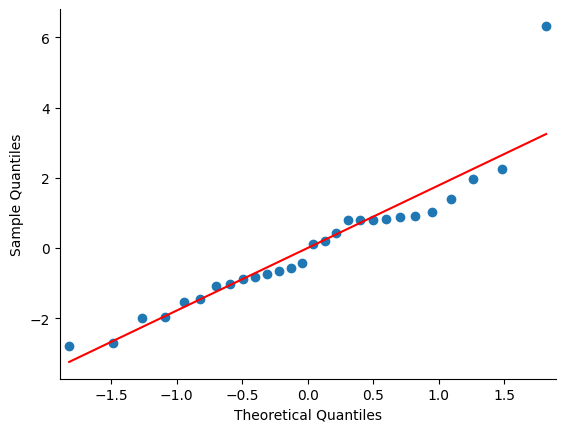

In [ ]:
# Região 1
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(residuos_1,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

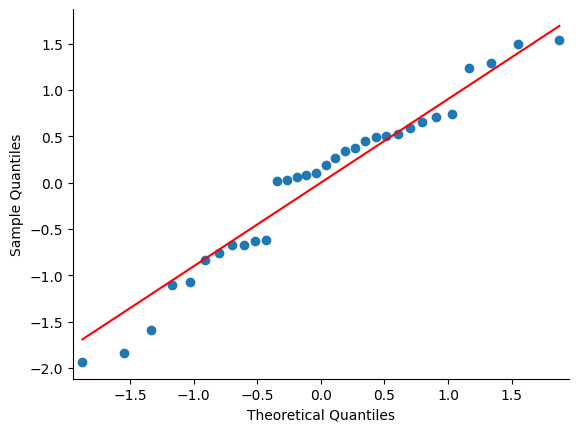

In [ ]:
# Região 2
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(residuos_2,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

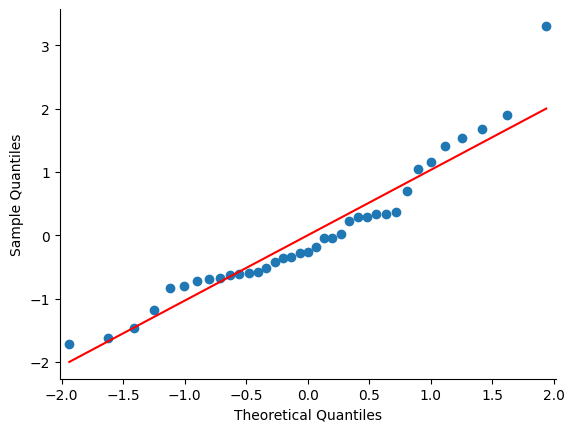

In [ ]:
# Região 3
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(residuos_3,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

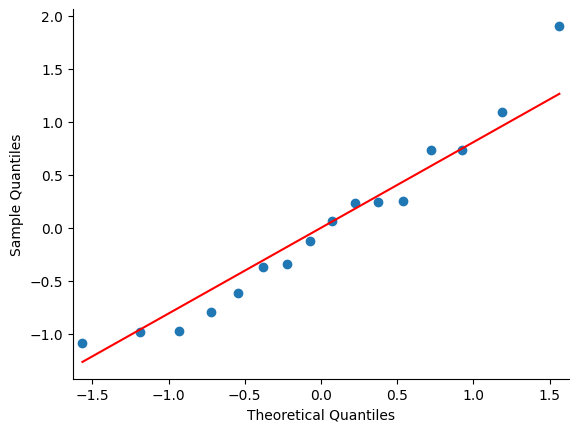

In [ ]:
# Região 4
fig = plt.figure()
ax = fig.add_subplot(111)
sm.qqplot(residuos_4,line='s',ax = ax)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

De todos os modelos, nenhum parece se distribuir muito bem na reta normal do QQ Plot. Pode-se explicar estes padrões por alguns possuírem distribuições com caudas mais pesadas que a da Normal (Região 1 ou 3, possivelmente), serem resíduos de uma relação não linear (Região 2, possivelmente) ou resíduos com variância que cresce com alguma das covariáveis (também Região 1, 3 ou 4, possivelmente).